In [1]:
import nasdaqdatalink as ndl
import logging
import os

APIKEY = os.getenv('NASDAQ_DATA_LINK_API_KEY')

logging.basicConfig()
data_link_log = logging.getLogger("nasdaqdatalink")
data_link_log.setLevel('DEBUG')

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
df = ndl.get('WIKI/TSLA', api_key=APIKEY)

<AxesSubplot:xlabel='Date'>

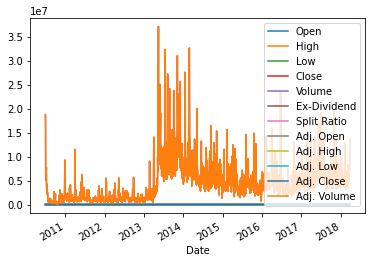

In [13]:
df.plot()

In [14]:
prices = df['Close']
volumes = df['Volume']
prices.head()

Date
2010-06-29    23.89
2010-06-30    23.83
2010-07-01    21.96
2010-07-02    19.20
2010-07-06    16.11
Name: Close, dtype: float64

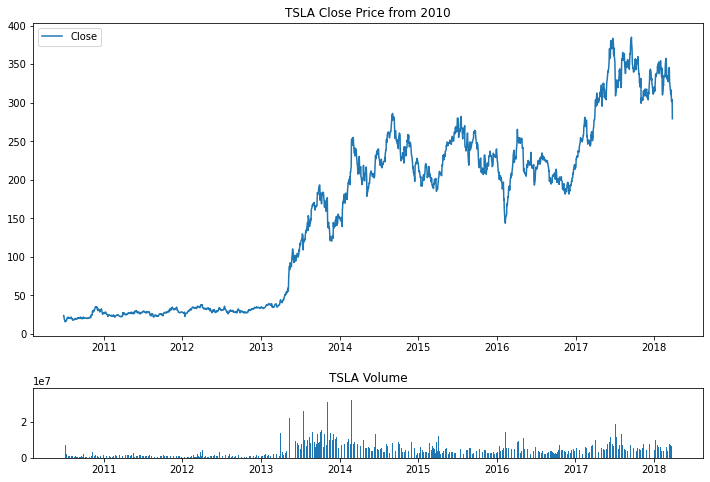

In [10]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Close')
plt.title('TSLA Close Price from 2010')
plt.legend(loc=2)

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('TSLA Volume')

plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

In [15]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [19]:
df_subset = ndl.get('WIKI/TSLA', start_date='2016-07-01', end_date='2016-07-31', api_key=APIKEY)
df_subset.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-07-01,206.14,218.2400,206.00,216.50,5399951.0,0.0,1.0,206.14,218.2400,206.00,216.50,5399951.0
2016-07-05,209.73,214.5441,208.00,213.98,5175345.0,0.0,1.0,209.73,214.5441,208.00,213.98,5175345.0
2016-07-06,210.00,215.2300,209.00,214.44,4919855.0,0.0,1.0,210.00,215.2300,209.00,214.44,4919855.0
2016-07-07,213.10,218.1200,213.01,215.94,3612022.0,0.0,1.0,213.10,218.1200,213.01,215.94,3612022.0
2016-07-08,217.80,219.8100,214.50,216.78,4074785.0,0.0,1.0,217.80,219.8100,214.50,216.78,4074785.0


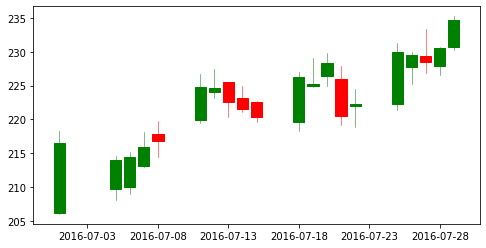

In [22]:
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open','High','Low','Close']]

figure, ax = plt.subplots(figsize=(8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax,
                    df_ohlc.values,
                    width=0.8,
                    colorup='green',
                    colordown='red')
plt.show()
                

In [24]:
df = ndl.get('EURONEXT/ABN.4', api_key=APIKEY)
df.tail()

,Last
Date,
2021-05-26,10.644
2021-05-27,10.902
2021-05-28,10.964
2021-05-31,10.920
2021-06-01,11.142


Plotting returns

<AxesSubplot:xlabel='Date'>

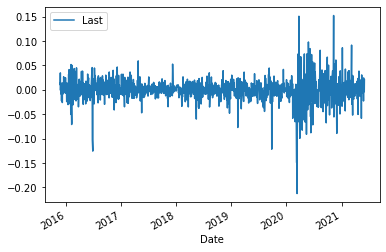

In [26]:

daily_changes = df.pct_change(periods=1)
daily_changes.plot()

Plotting cumulative returns

<AxesSubplot:xlabel='Date'>

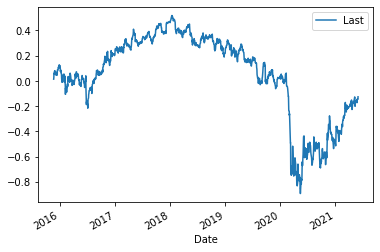

In [27]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot()

Plotting Histogram

array([[<AxesSubplot:title={'center':'Last'}>]], dtype=object)

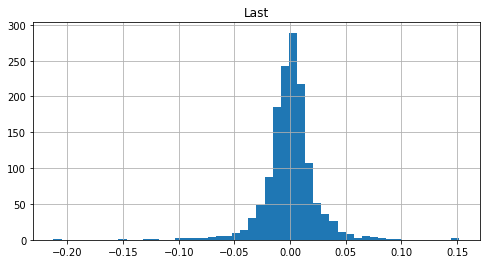

In [28]:
daily_changes.hist(bins=50, figsize=(8,4))

In [29]:
daily_changes.describe()

,Last
count,1408.000000
mean,-0.000089
std,0.022877
min,-0.212453
25%,-0.009574
50%,0.000283
75%,0.009749
max,0.152042


Plotting Volatility

<AxesSubplot:xlabel='Date'>

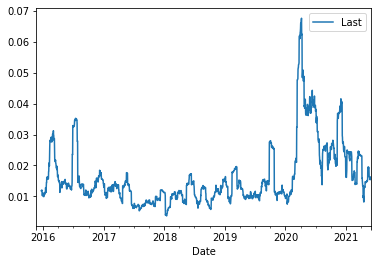

In [30]:
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot()

A Quantile-Quantile plot

In [31]:
from scipy import stats
from scipy.stats import probplot

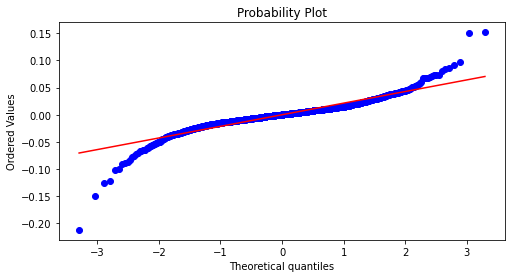

In [32]:
daily_changes = df.pct_change(periods=1).dropna()

figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)
plt.show()

In [37]:
df = ndl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4', 'EURONEXT/KA.4'], collapse='monthly', start_date='2016-01-01', end_date='2017-12-31')
df.head()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
Date,,,
2016-01-31,19.240,3.94,9.850
2016-02-29,18.240,3.67,10.080
2016-03-31,18.005,3.95,10.115
2016-04-30,18.670,4.50,9.091
2016-05-31,18.305,4.36,9.000


<AxesSubplot:xlabel='Date'>

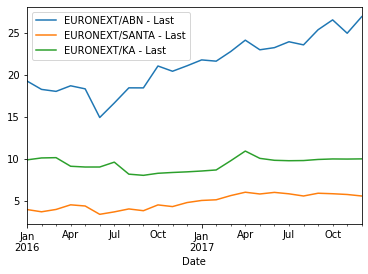

In [38]:
df.plot()

In [40]:
df.pct_change().corr() #method=pearson, altri kendall or spearman

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


Plotting Correlations

In [41]:
df = ndl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'], collapse='monthly', start_date='2016-01-01', end_date='2017-12-31')
df.head()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last
Date,,
2016-01-31,19.240,3.94
2016-02-29,18.240,3.67
2016-03-31,18.005,3.95
2016-04-30,18.670,4.50
2016-05-31,18.305,4.36


<AxesSubplot:xlabel='Date'>

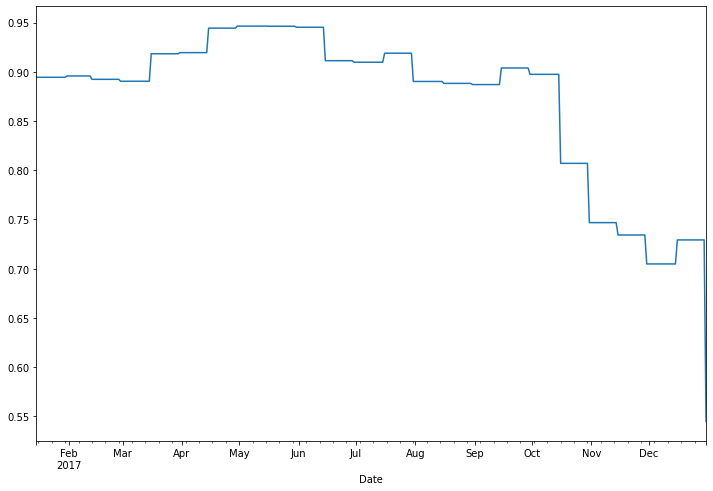

In [42]:
df_filled = df.asfreq('D', method='ffill')
daily_changes = df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
        .corr(other=santa_returns)\
            .dropna()
df_corrs.plot(figsize=(12,8))
